# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [121]:
df_kafe = pd.read_csv('Coffe_Sales.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

###1. Memahami Struktur Data

In [122]:
df_kafe.shape

(3263, 6)

In [123]:
df_kafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3263 non-null   object 
 1   datetime     3263 non-null   object 
 2   cash_type    3263 non-null   object 
 3   card         3174 non-null   object 
 4   money        3263 non-null   float64
 5   coffee_name  3263 non-null   object 
dtypes: float64(1), object(5)
memory usage: 153.1+ KB


In [124]:
df_kafe['date'] = pd.to_datetime(df_kafe['date'])
df_kafe['datetime'] = pd.to_datetime(df_kafe['datetime'])

In [125]:
df_kafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3263 non-null   datetime64[ns]
 1   datetime     3263 non-null   datetime64[ns]
 2   cash_type    3263 non-null   object        
 3   card         3174 non-null   object        
 4   money        3263 non-null   float64       
 5   coffee_name  3263 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 153.1+ KB


In [126]:
df_kafe

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3258,2025-02-25,2025-02-25 14:14:18.541,card,ANON-0000-0000-1161,35.76,Cappuccino
3259,2025-02-25,2025-02-25 16:49:37.395,card,ANON-0000-0000-0019,25.96,Americano
3260,2025-02-25,2025-02-25 16:50:35.811,card,ANON-0000-0000-0019,25.96,Americano
3261,2025-02-25,2025-02-25 18:19:09.057,card,ANON-0000-0000-1234,35.76,Cocoa


###2. Menangani Data yang Hilang

In [127]:
df_kafe.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [128]:
df_kafe.duplicated().sum()

np.int64(0)

In [129]:
# Mengisi dengan modus
mode_card = df_kafe['card'].mode()[0]
df_kafe['card'].fillna(mode_card, inplace=True)

<ipython-input-129-0a29650e18c2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_kafe['card'].fillna(mode_card, inplace=True)


In [130]:
df_kafe.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


###3. Analisis Distribusi dan Korelasi

In [131]:
df_kafe.describe()

,date,datetime,money
count,3263,3263,3263.000000
mean,2024-09-12 02:45:03.034017792,2024-09-12 17:30:02.763663872,31.798682
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000
25%,2024-06-18 00:00:00,2024-06-18 19:21:09.731500032,27.920000
50%,2024-09-22 00:00:00,2024-09-22 10:13:08.585999872,32.820000
75%,2024-12-01 00:00:00,2024-12-01 17:55:00.352000,35.760000
max,2025-02-25 00:00:00,2025-02-25 19:32:40.434000,40.000000
std,NaN,NaN,4.939635


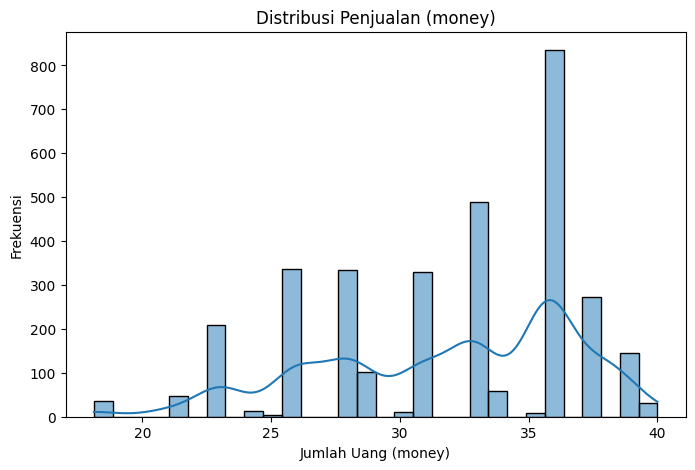

In [132]:
plt.figure(figsize=(8, 5))
sns.histplot(df_kafe['money'], bins=30, kde=True)
plt.title('Distribusi Penjualan (money)')
plt.xlabel('Jumlah Uang (money)')
plt.ylabel('Frekuensi')
plt.show()

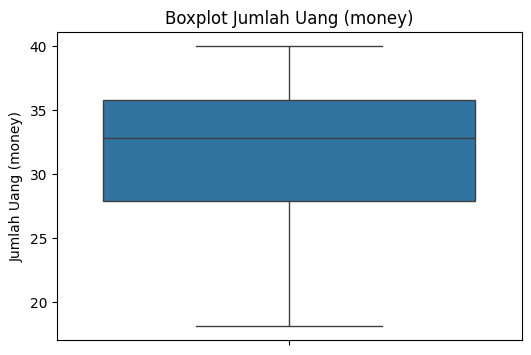

In [133]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_kafe['money'])
plt.title('Boxplot Jumlah Uang (money)')
plt.ylabel('Jumlah Uang (money)')
plt.show()

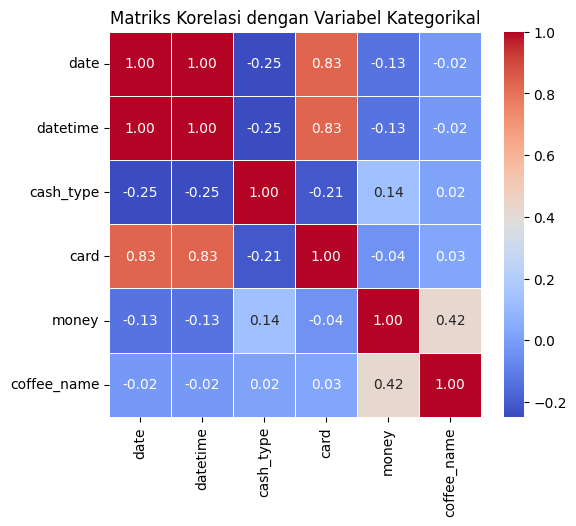

In [134]:
for col in ['card', 'cash_type', 'coffee_name']:
    df_kafe[col] = LabelEncoder().fit_transform(df_kafe[col])

corr_matrix = df_kafe.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi dengan Variabel Kategorikal')
plt.show()


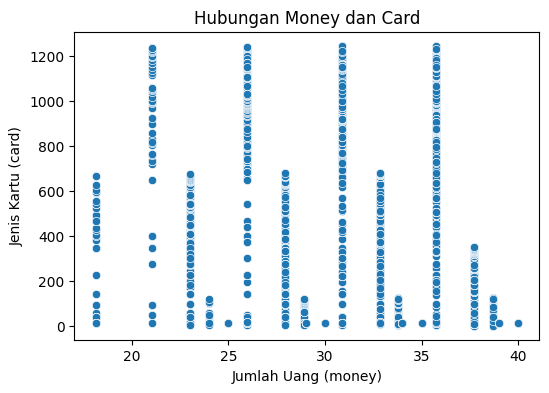

In [135]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_kafe['money'], y=df_kafe['card'])
plt.title('Hubungan Money dan Card')
plt.xlabel('Jumlah Uang (money)')
plt.ylabel('Jenis Kartu (card)')
plt.show()

###4.Visualisasi Data

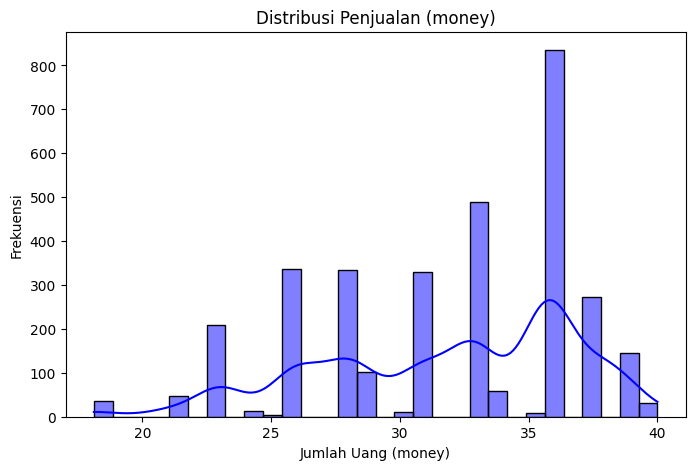

In [136]:
plt.figure(figsize=(8, 5))
sns.histplot(df_kafe['money'], bins=30, kde=True, color='blue')
plt.title('Distribusi Penjualan (money)')
plt.xlabel('Jumlah Uang (money)')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-137-def234011efc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_kafe,


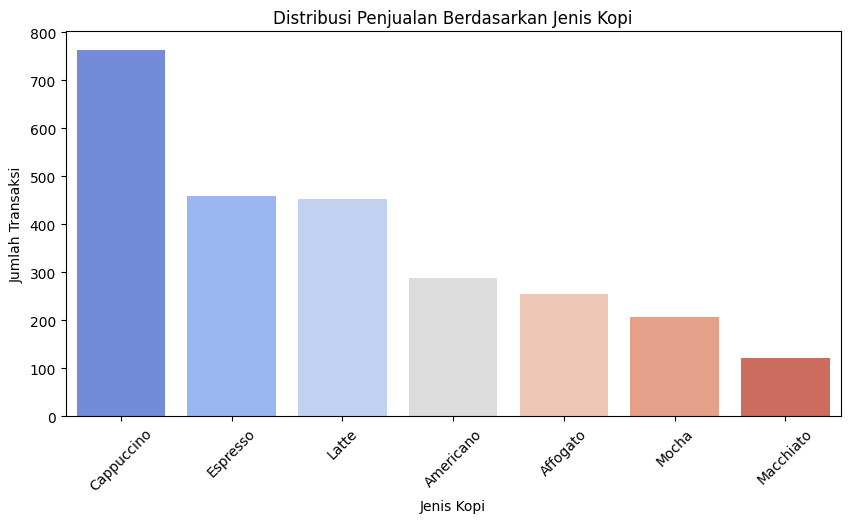

In [137]:
label_mapping = {
    0: 'Espresso',
    1: 'Cappuccino',
    2: 'Latte',
    3: 'Mocha',
    4: 'Americano',
    5: 'Macchiato',
    6: 'Affogato'
}

if df_kafe['coffee_name'].dtype != 'O':
    df_kafe['coffee_name'] = df_kafe['coffee_name'].map(label_mapping)

df_kafe = df_kafe.dropna(subset=['coffee_name'])

plt.figure(figsize=(10, 5))
sns.countplot(data=df_kafe,
              x='coffee_name',
              order=df_kafe['coffee_name'].value_counts().index,
              palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribusi Penjualan Berdasarkan Jenis Kopi')
plt.xlabel('Jenis Kopi')
plt.ylabel('Jumlah Transaksi')
plt.show()

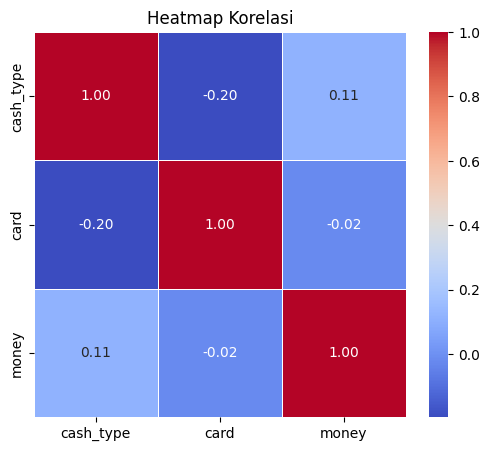

In [138]:
corr_matrix = df_kafe.select_dtypes(include=['number']).corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

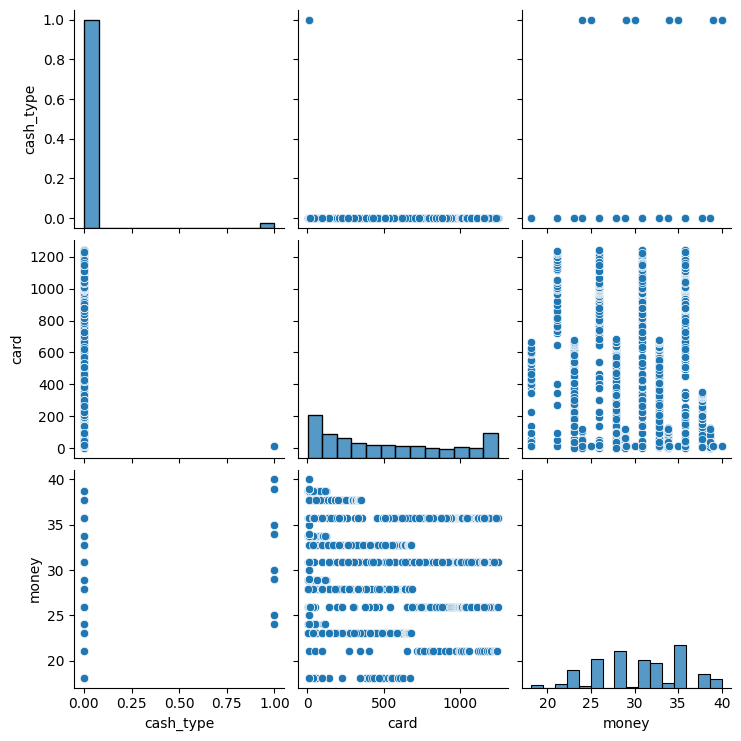

In [139]:
sns.pairplot(df_kafe.select_dtypes(include=['number']))
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [140]:
df_kafe.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [141]:
df_kafe.duplicated().sum()

np.int64(0)

In [142]:
df_kafe = df_kafe.copy()

df_kafe['money_original'] = df_kafe['money']

df_kafe['coffee_count'] = df_kafe['coffee_name'].map(df_kafe['coffee_name'].value_counts())

scaler = MinMaxScaler(feature_range=(0, 1))
df_kafe['money_scaled'] = scaler.fit_transform(df_kafe[['money_original']])

df_kafe['coffee_count_scaled'] = scaler.fit_transform(df_kafe[['coffee_count']])

print(df_kafe[['money_original', 'money_scaled', 'coffee_count', 'coffee_count_scaled']].head())


   money_original  money_scaled  coffee_count  coffee_count_scaled
1            38.7      0.940585           256             0.208723
2            38.7      0.940585           256             0.208723
3            28.9      0.492687           459             0.524922
5            33.8      0.716636           764             1.000000
6            38.7      0.940585           256             0.208723


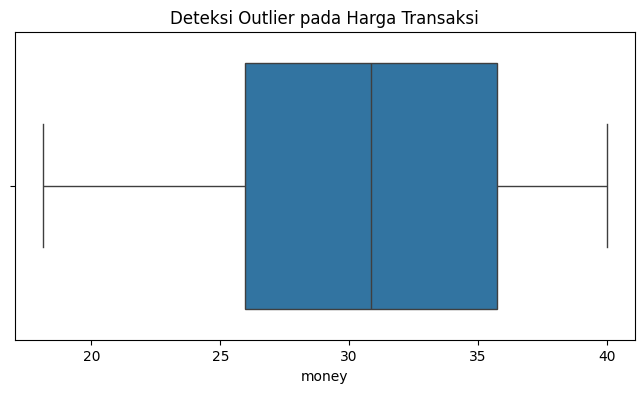

In [143]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_kafe['money'])
plt.title("Deteksi Outlier pada Harga Transaksi")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [144]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

In [145]:
features_for_clustering = df_kafe[["money_scaled", "coffee_count_scaled"]]

kmeans.fit(features_for_clustering)

df_kafe["cluster"] = kmeans.predict(features_for_clustering)

print(df_kafe[["money", "money_scaled", "coffee_count_scaled", "cluster"]].head())


   money  money_scaled  coffee_count_scaled  cluster
1   38.7      0.940585             0.208723        2
2   38.7      0.940585             0.208723        2
3   28.9      0.492687             0.524922        0
5   33.8      0.716636             1.000000        1
6   38.7      0.940585             0.208723        2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [146]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_kafe[["money_scaled", "coffee_count_scaled"]])
    inertia.append(kmeans.inertia_)

In [147]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_kafe[["money_scaled", "coffee_count_scaled"]])

silhouette_avg = silhouette_score(df_kafe[["money_scaled", "coffee_count_scaled"]], cluster_labels)
print(f"Silhouette Score untuk {optimal_k} cluster: {silhouette_avg:.4f}")

Silhouette Score untuk 3 cluster: 0.6348


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

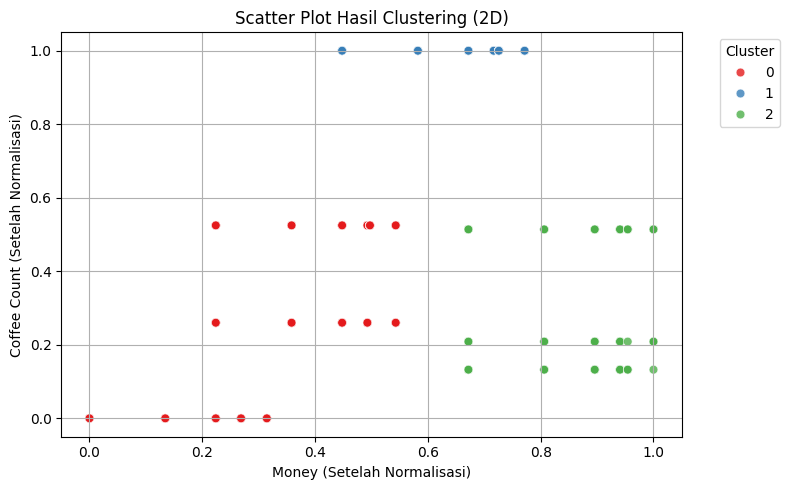

In [148]:
unique_clusters = df_kafe["cluster"].nunique()
custom_palette = sns.color_palette("Set1", unique_clusters)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df_kafe["money_scaled"],
    y=df_kafe["coffee_count_scaled"],
    hue=df_kafe["cluster"],
    palette=custom_palette,
    s=40,
    alpha=0.8
)

plt.xlabel("Money (Setelah Normalisasi)")
plt.ylabel("Coffee Count (Setelah Normalisasi)")
plt.title("Scatter Plot Hasil Clustering (2D)")

plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [149]:
df_kafe['cluster'] = cluster_labels

print(df_kafe.head())

        date                datetime  cash_type  card  money coffee_name  \
1 2024-03-01 2024-03-01 12:19:22.539          0     1   38.7    Affogato   
2 2024-03-01 2024-03-01 12:20:18.089          0     1   38.7    Affogato   
3 2024-03-01 2024-03-01 13:46:33.006          0     2   28.9    Espresso   
5 2024-03-01 2024-03-01 15:39:47.726          0     4   33.8  Cappuccino   
6 2024-03-01 2024-03-01 16:19:02.756          0     5   38.7    Affogato   

   money_original  coffee_count  money_scaled  coffee_count_scaled  cluster  
1            38.7           256      0.940585             0.208723        2  
2            38.7           256      0.940585             0.208723        2  
3            28.9           459      0.492687             0.524922        0  
5            33.8           764      0.716636             1.000000        1  
6            38.7           256      0.940585             0.208723        2  


In [150]:
df_kafe["money_inverse"] = scaler.inverse_transform(df_kafe[["money_scaled"]])

print(df_kafe[["money_original", "money_scaled", "money_inverse"]].head())

   money_original  money_scaled  money_inverse
1            38.7      0.940585     725.855576
2            38.7      0.940585     725.855576
3            28.9      0.492687     438.305302
5            33.8      0.716636     582.080439
6            38.7      0.940585     725.855576


In [151]:
df_kafe["money_inverse"] = scaler.inverse_transform(df_kafe[["money_scaled"]])

print(df_kafe[["money_original", "money_scaled", "money_inverse"]].head())

   money_original  money_scaled  money_inverse
1            38.7      0.940585     725.855576
2            38.7      0.940585     725.855576
3            28.9      0.492687     438.305302
5            33.8      0.716636     582.080439
6            38.7      0.940585     725.855576


In [152]:
df_kafe['coffee_count_original'] = df_kafe['coffee_count']
df_kafe['coffee_count_scaled'] = scaler.fit_transform(df_kafe[['coffee_count_original']])
df_kafe["coffee_inverse"] = scaler.inverse_transform(df_kafe[["coffee_count_scaled"]])
print(df_kafe[["coffee_count_original", "coffee_count_scaled", "coffee_inverse"]].head())


   coffee_count_original  coffee_count_scaled  coffee_inverse
1                    256             0.208723           256.0
2                    256             0.208723           256.0
3                    459             0.524922           459.0
5                    764             1.000000           764.0
6                    256             0.208723           256.0


In [153]:
df_kafe["coffe_inverse"] = scaler.inverse_transform(df_kafe[["coffee_count_scaled"]])

print(df_kafe[["coffee_count_original", "coffee_count_scaled", "coffe_inverse"]].head())


   coffee_count_original  coffee_count_scaled  coffe_inverse
1                    256             0.208723          256.0
2                    256             0.208723          256.0
3                    459             0.524922          459.0
5                    764             1.000000          764.0
6                    256             0.208723          256.0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [154]:
df_kafe['money_inverse'] = scaler.inverse_transform(df_kafe[['money_scaled']])

In [155]:
df_kafe['coffe_inverse'] = scaler.inverse_transform(df_kafe[['coffee_count_scaled']])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [156]:
# Ringkasan per cluster untuk money dan coffee_count
cluster_summary = df_kafe.groupby("cluster").agg(
    Mean_Money=("money", "mean"),
    Median_Money=("money", "median"),
    Std_Money=("money", "std"),
    Mean_Coffee=("coffee_count", "mean"),
    Median_Coffee=("coffee_count", "median"),
    Std_Coffee=("coffee_count", "std"),
    Jumlah_Pelanggan=("money", "count")
).reset_index()

# Menampilkan hasil ringkasan per cluster
for index, row in cluster_summary.iterrows():
    print(f"Cluster {row['cluster']}:")
    print(f"- Rata-rata Money: {row['Mean_Money']:.2f}")
    print(f"- Median Money: {row['Median_Money']:.2f}")
    print(f"- Standar Deviasi Money: {row['Std_Money']:.2f}")
    print(f"- Rata-rata Coffee Count: {row['Mean_Coffee']:.2f}")
    print(f"- Median Coffee Count: {row['Median_Coffee']:.2f}")
    print(f"- Standar Deviasi Coffee Count: {row['Std_Coffee']:.2f}")
    print(f"- Jumlah Pelanggan: {int(row['Jumlah_Pelanggan'])}")
    print("-" * 40)


Cluster 0.0:
- Rata-rata Money: 25.28
- Median Money: 25.96
- Standar Deviasi Money: 2.69
- Rata-rata Coffee Count: 355.27
- Median Coffee Count: 459.00
- Standar Deviasi Coffee Count: 121.59
- Jumlah Pelanggan: 870
----------------------------------------
Cluster 1.0:
- Rata-rata Money: 30.65
- Median Money: 30.86
- Standar Deviasi Money: 2.01
- Rata-rata Coffee Count: 764.00
- Median Coffee Count: 764.00
- Standar Deviasi Coffee Count: 0.00
- Jumlah Pelanggan: 764
----------------------------------------
Cluster 2.0:
- Rata-rata Money: 35.97
- Median Money: 35.76
- Standar Deviasi Money: 1.78
- Rata-rata Coffee Count: 341.74
- Median Coffee Count: 256.00
- Standar Deviasi Coffee Count: 110.38
- Jumlah Pelanggan: 915
----------------------------------------


1. Cluster 0:
Rata-rata Money: 25.28
Median Money: 25.96
Standar Deviasi Money: 2.69
Jumlah Pelanggan: 870
Rata-rata Coffee Count: 355.27
Median Coffee Count: 459.00
Standar Deviasi Coffee Count: 121.59

Analisis:
Pelanggan dalam cluster ini memiliki pengeluaran yang sedang dan jumlah pembelian kopi yang cukup bervariasi. Standar deviasi pada pembelian kopi menunjukkan perbedaan preferensi dalam jumlah pembelian, meskipun secara pengeluaran cukup stabil. Cocok untuk strategi loyalitas atau upselling kopi.

2. Cluster 1
Rata-rata Money: 30.65
Median Money: 30.86
Standar Deviasi Money: 2.01
Jumlah Pelanggan: 764
Rata-rata Coffee Count: 764.00
Median Coffee Count: 764.00
Standar Deviasi Coffee Count: 0.00

Analisis:
Cluster ini unik karena semua pelanggan membeli jumlah kopi yang sama persis (764), mungkin karena promo atau paket khusus. Pengeluaran juga tergolong tinggi dan stabil. Cluster ini sangat potensial untuk produk bundling atau penawaran eksklusif karena konsistensinya.



3. Cluster 2
Rata-rata Money: 35.97
Median Money: 35.76
Standar Deviasi Money: 1.78
Jumlah Pelanggan: 915
Rata-rata Coffee Count: 341.74
Median Coffee Count: 256.00
Standar Deviasi Coffee Count: 110.38

Analisis:
Cluster ini memiliki pengeluaran tertinggi namun jumlah kopi yang dibeli tidak sebanyak Cluster 1. Ini menunjukkan pelanggan ini mungkin membeli kopi premium atau jenis menu mahal lainnya. Cocok untuk strategi pemasaran premium, seperti voucher eksklusif atau layanan khusus pelanggan VIP.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [157]:
df_kafe.to_csv("df_kafe.csv", index=False)